In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
df = pd.read_csv("emissions.csv")
df2 = df[["project_name", "cpu_energy", "ram_energy"]]

In [3]:
df2 = df2.set_index("project_name")

Text(0.5, 0, '')

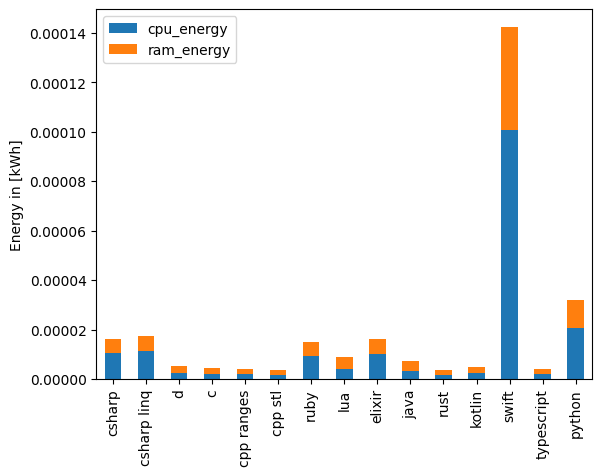

In [4]:
ax = df2.plot.bar(stacked=True)
plt.ylabel("Energy in [kWh]")
plt.xlabel("")
#ax.bar_label(ax.containers[0])

In [5]:
df2

,cpu_energy,ram_energy
project_name,,
csharp,0.000011,0.000006
csharp linq,0.000011,0.000006
d,0.000003,0.000003
c,0.000002,0.000002
cpp ranges,0.000002,0.000002
cpp stl,0.000002,0.000002
ruby,0.000009,0.000006
lua,0.000004,0.000005
elixir,0.000010,0.000006


In [6]:
df2["total_energy"] = df2.cpu_energy + df2.ram_energy

In [7]:
df2

,cpu_energy,ram_energy,total_energy
project_name,,,
csharp,0.000011,0.000006,0.000016
csharp linq,0.000011,0.000006,0.000017
d,0.000003,0.000003,0.000005
c,0.000002,0.000002,0.000004
cpp ranges,0.000002,0.000002,0.000004
cpp stl,0.000002,0.000002,0.000004
ruby,0.000009,0.000006,0.000015
lua,0.000004,0.000005,0.000009
elixir,0.000010,0.000006,0.000016


In [8]:
df2.sort_values("total_energy", ascending=False)

,cpu_energy,ram_energy,total_energy
project_name,,,
swift,0.000101,0.000042,0.000143
python,0.000021,0.000011,0.000032
csharp linq,0.000011,0.000006,0.000017
csharp,0.000011,0.000006,0.000016
elixir,0.000010,0.000006,0.000016
ruby,0.000009,0.000006,0.000015
lua,0.000004,0.000005,0.000009
java,0.000003,0.000004,0.000007
d,0.000003,0.000003,0.000005


In [9]:
min_val = df2.total_energy.min()
df2["normed_total_energy"] = df2.total_energy / min_val

In [10]:
df2

,cpu_energy,ram_energy,total_energy,normed_total_energy
project_name,,,,
csharp,0.000011,0.000006,0.000016,4.653198
csharp linq,0.000011,0.000006,0.000017,4.994966
d,0.000003,0.000003,0.000005,1.528530
c,0.000002,0.000002,0.000004,1.238105
cpp ranges,0.000002,0.000002,0.000004,1.120199
cpp stl,0.000002,0.000002,0.000004,1.059072
ruby,0.000009,0.000006,0.000015,4.347437
lua,0.000004,0.000005,0.000009,2.504060
elixir,0.000010,0.000006,0.000016,4.623566


In [11]:
df3 = df2[["normed_total_energy"]]

In [12]:
df3

,normed_total_energy
project_name,
csharp,4.653198
csharp linq,4.994966
d,1.528530
c,1.238105
cpp ranges,1.120199
cpp stl,1.059072
ruby,4.347437
lua,2.504060
elixir,4.623566


Text(0.5, 0, '')

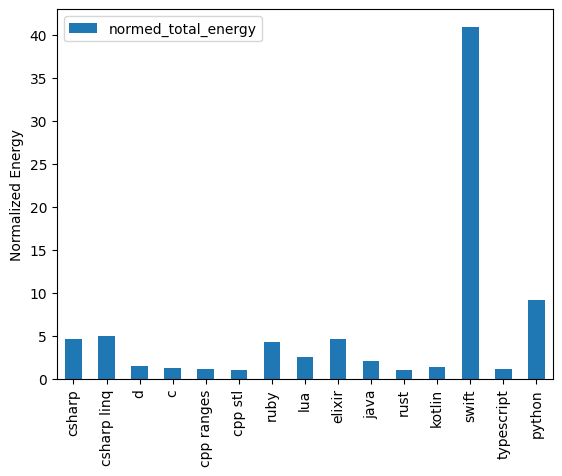

In [13]:
df3.plot.bar(stacked=True)
plt.ylabel("Normalized Energy")
plt.xlabel("")

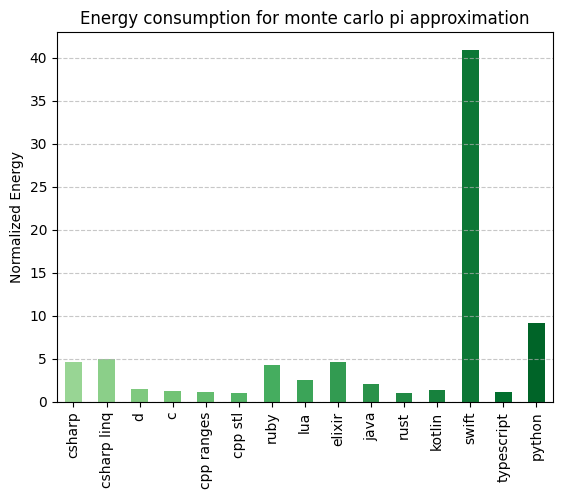

In [17]:
# Generate shades of green for each bar
colors = cm.Greens(np.linspace(0.4, 0.9, len(df3)))

ax = df3["normed_total_energy"].plot(kind="bar", color=colors)
plt.ylabel("Normalized Energy")
plt.xlabel("")
plt.title("Energy consumption for monte carlo pi approximation")  # Add title
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Add grid on y-axis
plt.show()

In [19]:
min_val * 1000

0.003481714399221788